---
**License**

 VacuumStudyAdiabatic

 Mon Jun 01 09:20:00 2020
 Copyright  2020
 Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 VacuumStudyAdiabatic
 Copyright (C) 2020 Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from IPython.display import HTML

from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
%matplotlib inline

# Figure utilities

In [2]:
fig_width_pt  = 246.0 * 2.0                 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27                 # Convert pt to inch
golden_mean   = (math.sqrt (5) - 1.0) / 2.0 # Aesthetic ratio
fig_width     = fig_width_pt*inches_per_pt  # width in inches
fig_height    = fig_width*golden_mean       # height in inches
fig_size      = [ fig_width, fig_height ]

params = {
          'axes.labelsize' : 10,
          'font.size'      : 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex'    : True,
          'figure.figsize' : fig_size,
          'animation.embed_limit' : 2**128
         }

mpl.rcParams.update (params)

def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        if base == 1.0:
          if exponent == 0.0:
            return r"1"
          else:
            return r"10^{{{1}}}".format (int(exponent))
        elif exponent == 0.0:
          return r"{0}".format (base)
        else:
          return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str

# Initializing the library

In [3]:
__name__ = "NcContext"

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

# Complex structure quantization object

Below we define our object as a child of the complex structure quantization object Ncm.CSQ1D

In [4]:
csq1d = Nc.DECont (Omegaw = 1.0, OmegaL = 0.0, w = 1.0e-6, cs2 = 1.0e-6)

ti = 1.0e-10
tf = 5.0e-3

ki    = 1.0e0
kf    = 1.0e2
k_a   = np.geomspace (ki, kf, 1000)

csq1d.set_k (kf)

Found, tAD = csq1d.find_adiab_time_limit (None, ti, tf, 1.0e-5)

alpha0, dgamma0, _, _ = csq1d.eval_adiab_at (None, tAD)
xi0 = csq1d.eval_xi (None, tAD, csq1d.get_k ())
gamma0 = xi0 + dgamma0

Found, tfAD = csq1d.find_adiab_time_limit (None, ti, 1.0e1, 1.0e-1)
if Found:
    tf = tfAD

print (ti, tAD, tf)

1e-10 5.059812577716686e-05 0.005059717874032467


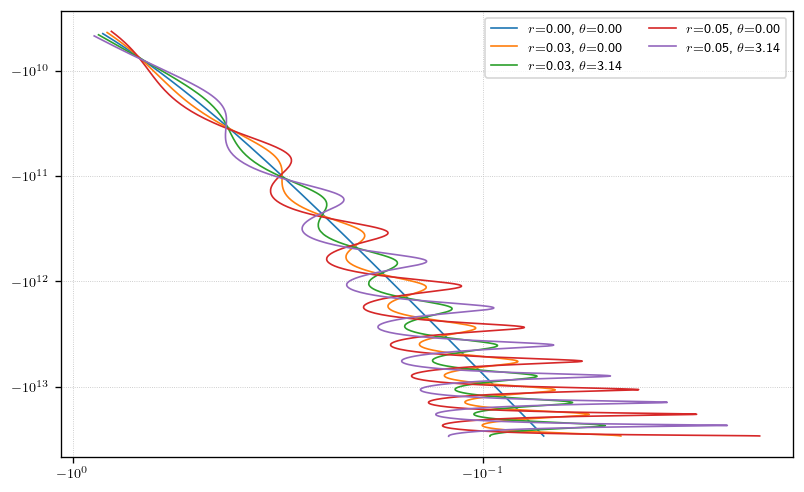

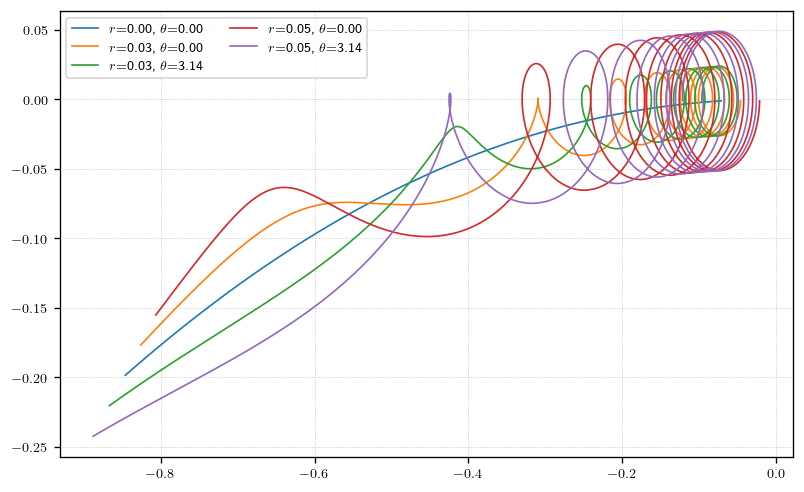

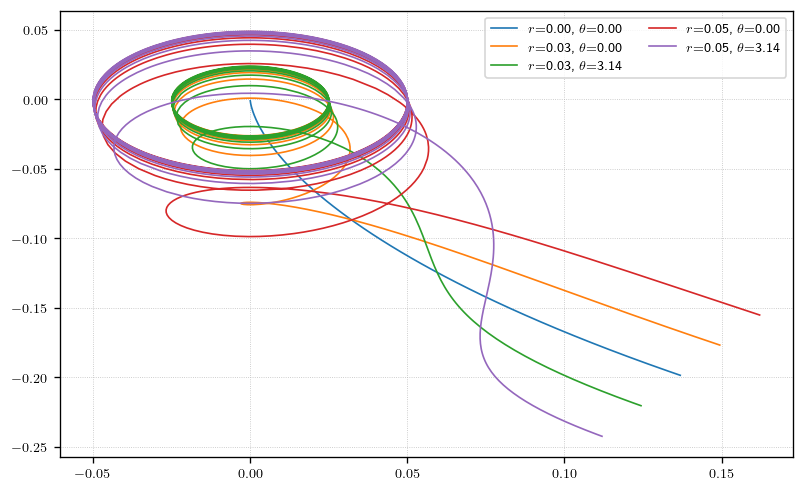

In [5]:
mylw = 1.0

r_a = np.linspace (0.0, 0.05, 3)
theta_a = np.linspace (0.0, 2.0 * math.pi, 2, endpoint = False)

fig = plt.figure (dpi = 120)

for r in r_a:
    for theta in theta_a:
        
        if r == 0 and theta > 0.0:
            continue
        
        alpha, dgamma = csq1d.alpha_gamma_circle (None, alpha0, dgamma0, r, theta)
                
        csq1d.set_init_cond (Ncm.CSQ1DEvolState.ADIABATIC, tAD, alpha, dgamma)
        csq1d.set_tf (tf)
        csq1d.prepare ()
        
        t_a, tmax = csq1d.get_time_array ()
        mx1x2 = np.array ([csq1d.get_minkowski_frame (None, 0, t) for t in t_a])

        plt.plot (mx1x2[:,0], mx1x2[:,1], lw=mylw, label = r'$r$=%.2f, $\theta$=%.2f' % (r, theta))


plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)

plt.xscale('symlog', linthresh=1.0e-15)
plt.yscale('symlog', linthresh=1.0e-10)

fig.tight_layout ()
plt.savefig ("adiab_vacuum_f0.pdf")
plt.show ()


fig = plt.figure (dpi = 120)

for r in r_a:
    for theta in theta_a:
        
        if r == 0 and theta > 0.0:
            continue
        
        alpha, dgamma = csq1d.alpha_gamma_circle (None, alpha0, dgamma0, r, theta)
                
        csq1d.set_init_cond (Ncm.CSQ1DEvolState.ADIABATIC, tAD, alpha, dgamma)
        csq1d.set_tf (tf)
        csq1d.prepare ()
        
        t_a, tmax = csq1d.get_time_array ()
        mx1x2 = np.array ([csq1d.get_minkowski_frame (None, 1, t) for t in t_a])

        plt.plot (mx1x2[:,0], mx1x2[:,1], lw=mylw, label = r'$r$=%.2f, $\theta$=%.2f' % (r, theta))


plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)

fig.tight_layout ()
plt.savefig ("adiab_vacuum_f1.pdf")
plt.show ()

fig = plt.figure (dpi = 120)

for r in r_a:
    for theta in theta_a:
        
        if r == 0 and theta > 0.0:
            continue
        
        alpha, dgamma = csq1d.alpha_gamma_circle (None, alpha0, dgamma0, r, theta)
                
        csq1d.set_init_cond (Ncm.CSQ1DEvolState.ADIABATIC, tAD, alpha, dgamma)
        csq1d.set_tf (tf)
        csq1d.prepare ()
        
        t_a, tmax = csq1d.get_time_array ()
        mx1x2 = np.array ([csq1d.get_minkowski_frame (None, 2, t) for t in t_a])

        plt.plot (mx1x2[:,0], mx1x2[:,1], lw=mylw, label = r'$r$=%.2f, $\theta$=%.2f' % (r, theta))


plt.grid (b=True, which='both', linestyle=':', color='0.75', linewidth=0.5)
leg = plt.legend (loc="best", ncol = 2)

fig.tight_layout ()
plt.savefig ("adiab_vacuum_f2.pdf")
plt.show ()

